# Exploring Summer Weather Data for California

This notebook explores and visualizes weather data for a summer day in California using functions from the `explore_weather_day.py` module. We'll examine:

1. Summer weather patterns across California
2. Geographic distribution of weather data points
3. Temperature variations and hot spots
4. Precipitation patterns (typically lower in summer)
5. Vapor pressure deficit (important for fire risk assessment)

## Import Required Libraries and Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd
import sys
from pathlib import Path
from datetime import datetime

# Add the project root to sys.path to allow imports
project_root = Path().resolve().parents[0]
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# Import functions from the explore_weather_day module
from src.wildfire_prediction.exploration.explore_weather_day import (
    load_weather_data,
    load_california_map,
    explore_weather_data_summary,
    plot_point_distribution,
    plot_temperature_heatmap,
    plot_variable_distribution,
    explore_precipitation_patterns,
    explore_one_day
)

## Set Parameters for Summer Day Analysis

We'll analyze a typical summer day in California (August 1, 2013) to examine summer weather patterns.

In [2]:
# Date to explore - August 1, 2013 (typical summer day)
date_str = "20130801"

# Paths
data_dir = project_root / "data" / "raw" / "weather" / date_str[:4]
geojson_path = project_root / "notebooks" / "california.geojson"
save_dir = project_root / "reports" / "figures" / "weather_exploration"

# Create save directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

print(f"Data directory: {data_dir}")
print(f"GeoJSON path: {geojson_path}")
print(f"Save directory: {save_dir}")

Data directory: D:\FCAI\data_science\project\wildfire_prediction\wildfire_prediction\data\raw\weather\2013
GeoJSON path: D:\FCAI\data_science\project\wildfire_prediction\wildfire_prediction\notebooks\california.geojson
Save directory: D:\FCAI\data_science\project\wildfire_prediction\wildfire_prediction\reports\figures\weather_exploration


## Summer Weather Analysis Overview

Summer in California is typically characterized by:

- Higher temperatures, especially in inland areas
- Lower precipitation across the state
- Higher vapor pressure deficit (VPD) which increases wildfire risk
- Greater spatial variation in temperature between coastal and inland regions

These conditions often contribute to increased wildfire risk during this season.

## Option 1: Using the All-in-One Exploration Function

The simplest way to explore the summer data is to use the `explore_one_day` function.

Loaded weather data for 20130801
Shape: (23913, 6)
Columns: longitude, latitude, ppt, tmax, vbdmax, date

=== Weather Data Summary ===
Total data points: 23913
Longitude range: -124.374999999995 to -114.124999999913
Latitude range: 32.541666666528 to 41.95833333327

Precipitation (ppt) statistics:
count    23913.000000
mean         0.004557
std          0.068403
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.411000
Name: ppt, dtype: float64

Max Temperature (tmax) statistics:
count    23913.000000
mean        31.051001
std          6.215282
min         12.481000
25%         26.848000
50%         31.142000
75%         35.176000
max         47.410000
Name: tmax, dtype: float64

Max Vapor Pressure Deficit (vbdmax) statistics:
count    23913.000000
mean        38.214979
std         16.974080
min          0.711000
25%         26.729000
50%         36.088000
75%         46.703000
max         98.438000
Name: vbdmax, dtype: float64
Intera

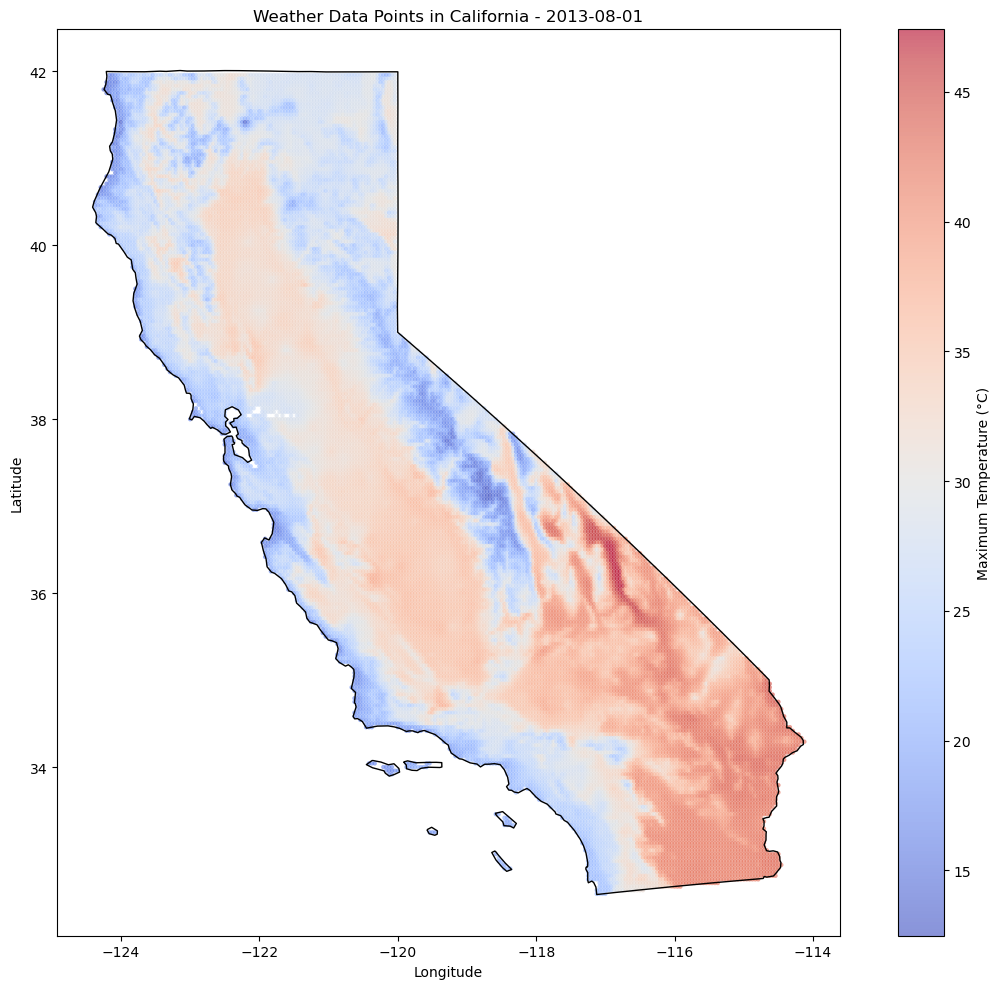

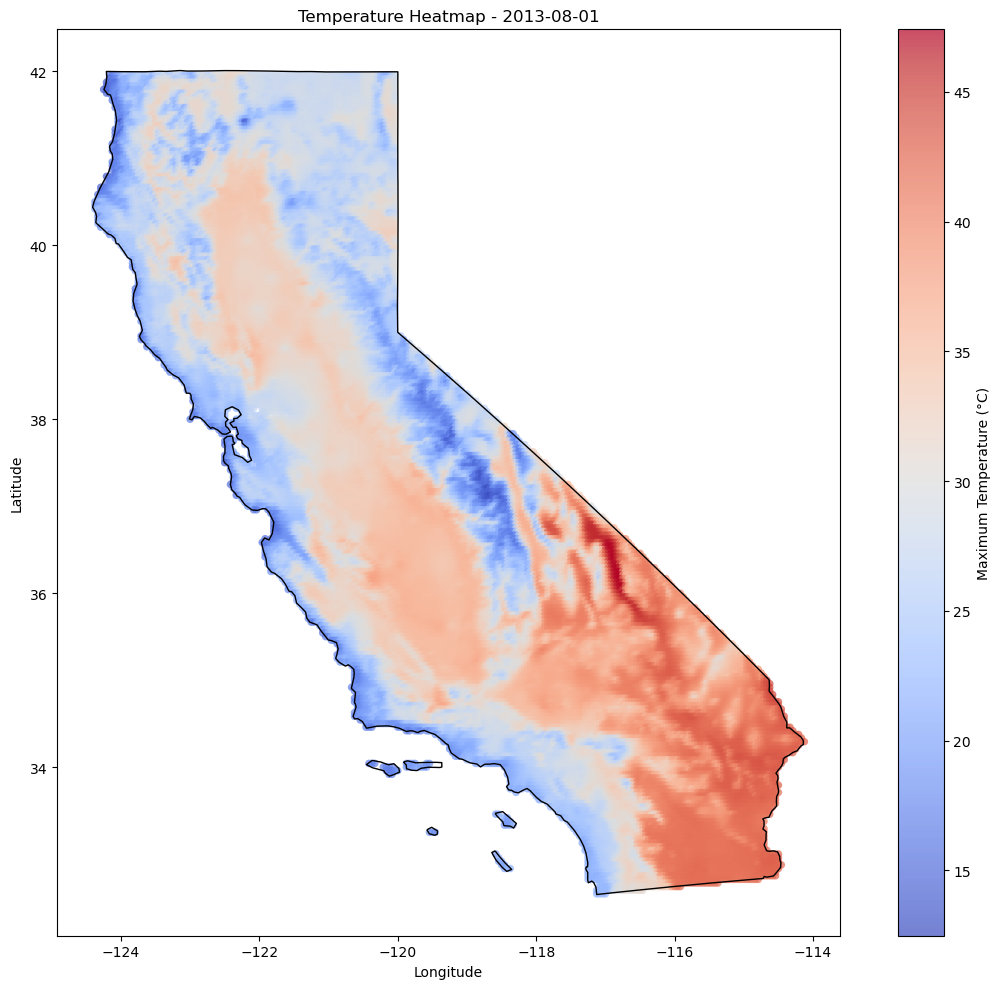

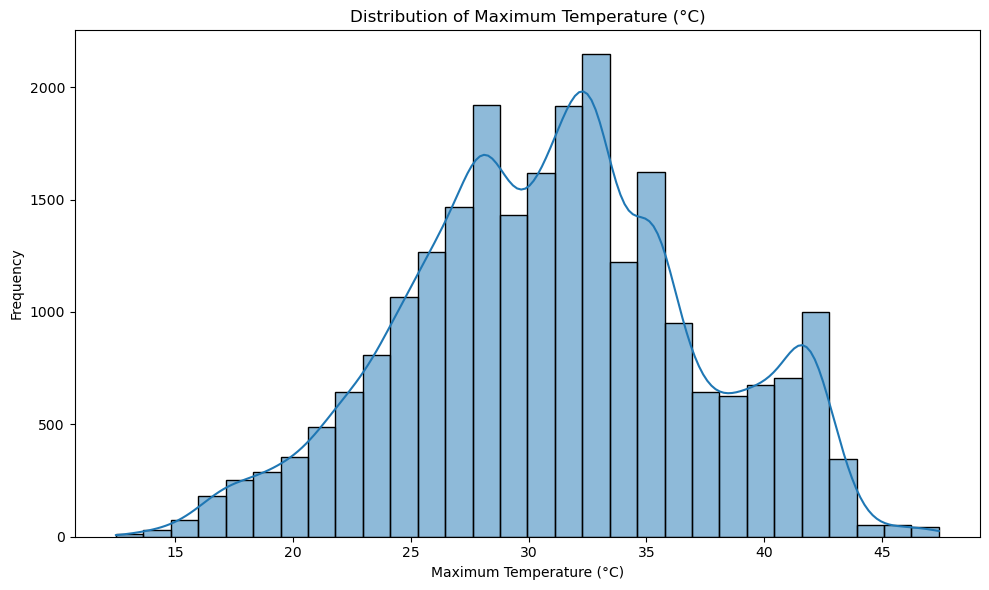

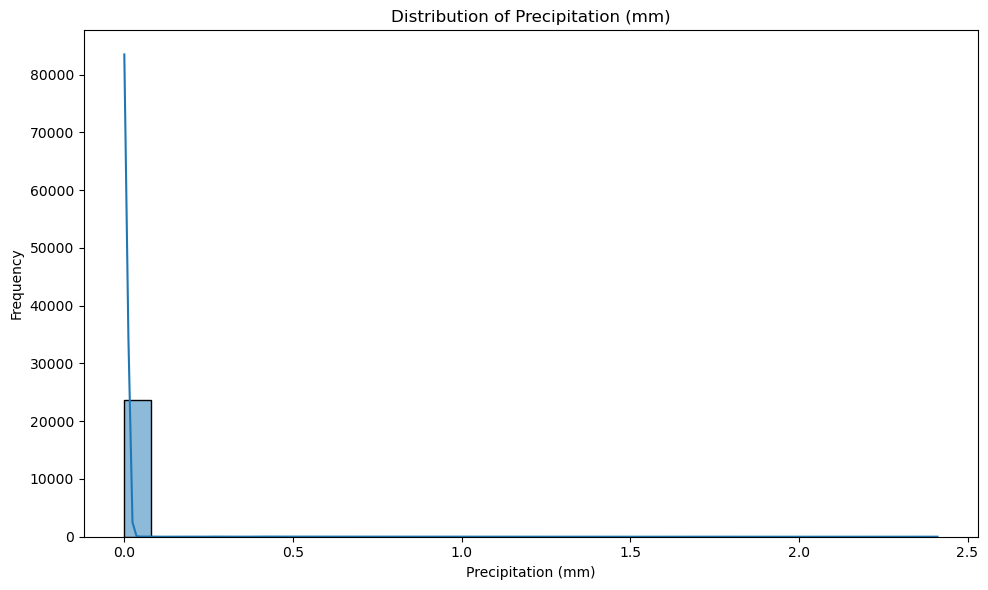

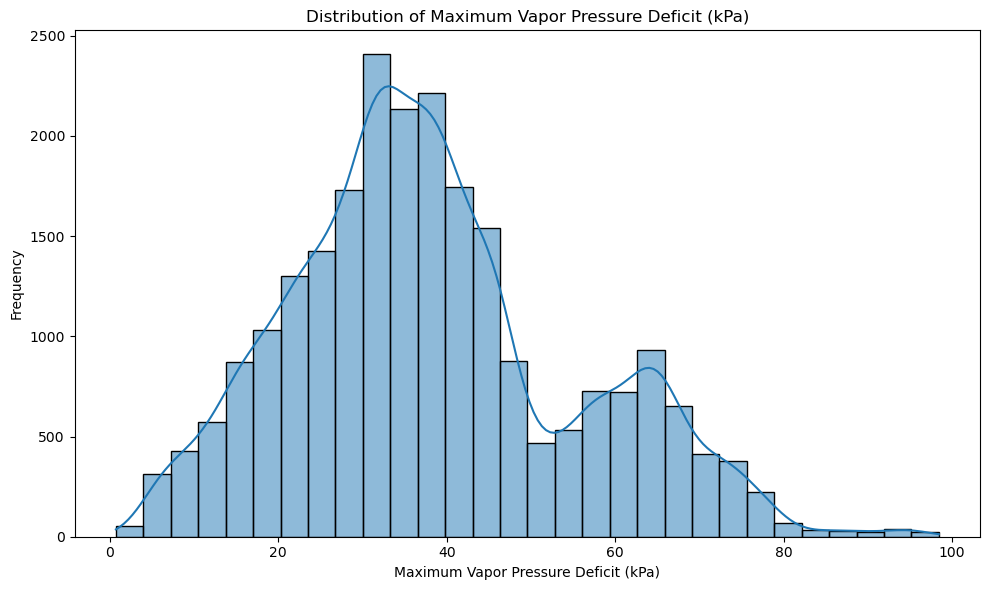

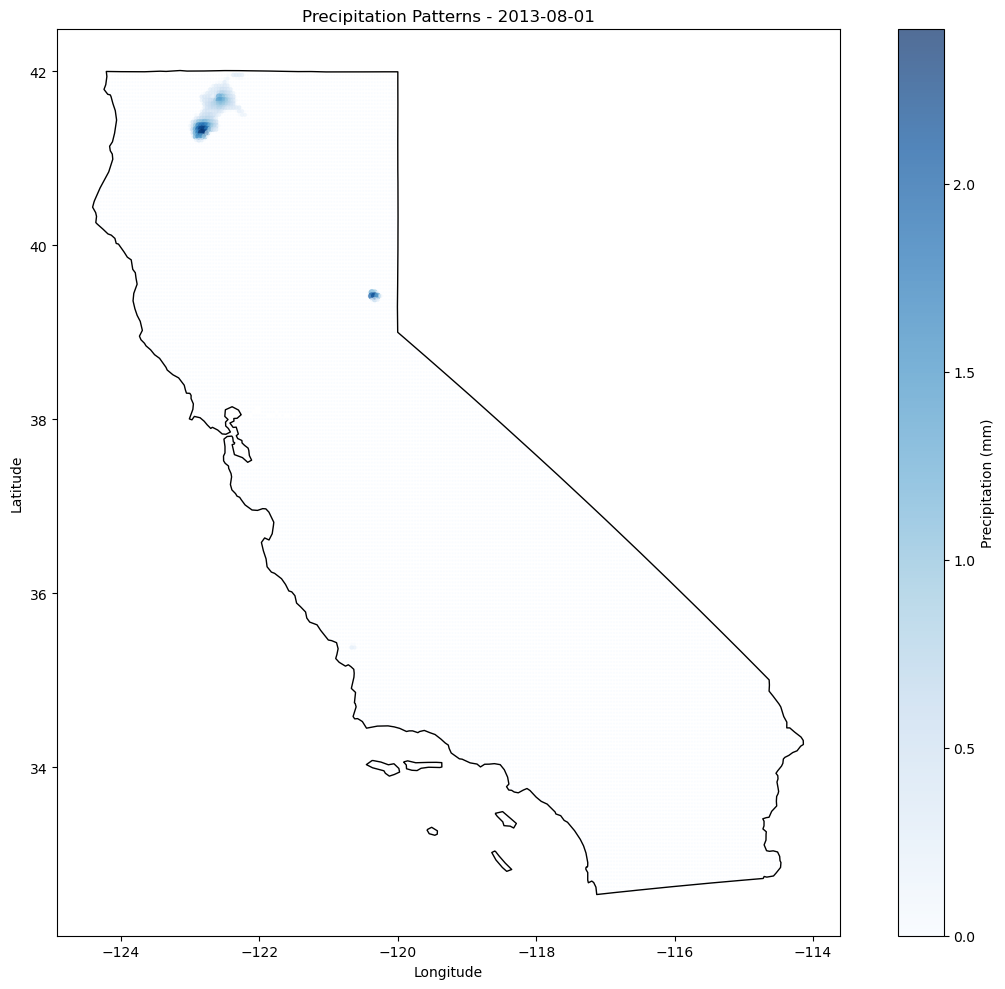

In [3]:
# Use the all-in-one function to explore the summer day data
results = explore_one_day(
    date_str=date_str,
    data_dir=data_dir,
    geojson_path=geojson_path,
    save_dir=save_dir
)

# Extract the data and summary from the results
df = results['data']
summary = results['summary']

## Option 2: Step-by-Step Summer Weather Exploration

For more detailed analysis, we can explore the summer day data step by step.

### 1. Load the Summer Weather Data

In [ ]:
# Load the weather data for the summer day
df = load_weather_data(date_str, data_dir)

# Display the first few rows of the data
df.head()

### 2. Load California Map

In [ ]:
# Load California map
try:
    california = load_california_map(geojson_path)
    print("California map loaded successfully")
except Exception as e:
    print(f"Warning: Could not load California map: {e}")
    california = None

### 3. Explore Summer Weather Data Summary

Examining key statistics will help us understand the temperature and precipitation patterns on this summer day.

In [ ]:
# Generate summary statistics for the summer weather data
summary = explore_weather_data_summary(df)

# Display additional information about summer conditions
print("\nSummer Weather Conditions:")
print(f"Average maximum temperature: {summary['max_temp_stats']['mean']:.2f}°C")
print(f"Maximum temperature range: {summary['max_temp_stats']['min']:.2f}°C to {summary['max_temp_stats']['max']:.2f}°C")
print(f"Average precipitation: {summary['precipitation_stats']['mean']:.2f}mm")
print(f"Average vapor pressure deficit: {summary['max_vpd_stats']['mean']:.2f}kPa")

### 4. Visualize Summer Temperature Distribution

This will show us the geographic distribution of temperature across California during summer.

In [ ]:
# Plot the distribution of temperature data points on a California map
fig_points, ax_points = plot_point_distribution(df, california)
ax_points.set_title(f'Summer Temperature Distribution in California - {date_str}')
plt.show()

### 5. Visualize Summer Temperature Heatmap

The heatmap will highlight temperature hot spots that are typical during summer in California.

In [ ]:
# Create a summer temperature heatmap over California
fig_temp, ax_temp = plot_temperature_heatmap(df, california)
ax_temp.set_title(f'Summer Temperature Heatmap - {date_str}')
plt.show()

### 6. Explore Summer Weather Variable Distributions

Analyze the distributions of temperature, precipitation, and vapor pressure deficit during summer.

In [ ]:
# Plot summer temperature (tmax) distribution
fig_tmax, ax_tmax = plot_variable_distribution(df, 'tmax')
ax_tmax.set_title(f'Distribution of Maximum Temperature (°C) - Summer Day {date_str}')
plt.show()

In [ ]:
# Plot summer precipitation (ppt) distribution
fig_ppt, ax_ppt = plot_variable_distribution(df, 'ppt')
ax_ppt.set_title(f'Distribution of Precipitation (mm) - Summer Day {date_str}')
plt.show()

In [ ]:
# Plot summer vapor pressure deficit (vbdmax) distribution
fig_vbd, ax_vbd = plot_variable_distribution(df, 'vbdmax')
ax_vbd.set_title(f'Distribution of Vapor Pressure Deficit (kPa) - Summer Day {date_str}')
plt.show()

### 7. Explore Summer Precipitation Patterns

Summer in California typically shows lower precipitation levels compared to winter.

In [ ]:
# Visualize summer precipitation patterns across California
fig_precip, ax_precip = explore_precipitation_patterns(df, california)
ax_precip.set_title(f'Summer Precipitation Patterns - {date_str}')
plt.show()

## Analyzing Vapor Pressure Deficit in Summer

Vapor Pressure Deficit (VPD) is particularly important for wildfire risk assessment during summer months.

In [ ]:
# Create a VPD visualization for summer
fig, ax = plt.subplots(figsize=(12, 10))

# If California map is available, plot it as background
if california is not None:
    california.boundary.plot(ax=ax, color='black', linewidth=1)

# Create a scatter plot with VPD
scatter = ax.scatter(
    df['longitude'], 
    df['latitude'], 
    c=df['vbdmax'],
    cmap='YlOrRd',
    alpha=0.7,
    s=25,
    edgecolor='none'
)

# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Maximum Vapor Pressure Deficit (kPa)')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'Summer Vapor Pressure Deficit - {date_str}')

plt.tight_layout()
plt.show()

## Save Summer Weather Figures

In [ ]:
# Save individual figures for the summer day analysis
fig_points.savefig(os.path.join(save_dir, f"{date_str}_summer_point_distribution.png"))
fig_temp.savefig(os.path.join(save_dir, f"{date_str}_summer_temperature_heatmap.png"))
fig_tmax.savefig(os.path.join(save_dir, f"{date_str}_summer_tmax_distribution.png"))
fig_ppt.savefig(os.path.join(save_dir, f"{date_str}_summer_ppt_distribution.png"))
fig_vbd.savefig(os.path.join(save_dir, f"{date_str}_summer_vbdmax_distribution.png"))
fig_precip.savefig(os.path.join(save_dir, f"{date_str}_summer_precipitation_patterns.png"))

print(f"Summer weather figures saved to: {save_dir}")

## Compare With Other Summer Days

We can explore different summer days to compare patterns and identify trends.

In [ ]:
# Function to explore different summer days
def explore_different_summer_day(new_date_str):
    print(f"Exploring summer weather data for {new_date_str}")
    
    # Update data directory for the new date
    new_data_dir = project_root / "data" / "raw" / "weather" / new_date_str[:4]
    
    # Use the all-in-one function to explore the data
    results = explore_one_day(
        date_str=new_date_str,
        data_dir=new_data_dir,
        geojson_path=geojson_path,
        save_dir=save_dir
    )
    
    return results

# Example: explore another summer day (July 15, 2013)
# Uncomment the line below to run it
# another_summer_results = explore_different_summer_day("20130715")

## Wildfire Risk Factors in Summer Weather

Summer weather conditions in California often contribute to increased wildfire risk through:

1. **High Temperatures**: Heating and drying vegetation, making it more combustible
2. **Low Precipitation**: Reducing moisture in soil and vegetation
3. **High Vapor Pressure Deficit (VPD)**: Increasing the drying power of the air
4. **Geographic Variations**: Creating high-risk areas, particularly in inland regions

Understanding these patterns helps identify periods and regions of elevated fire risk.

## Conclusion: Summer Weather and Wildfire Risk

This notebook explored weather data for a summer day in California, focusing on conditions relevant to wildfire risk. Key findings include:

1. Summer in California shows distinct temperature patterns with higher temperatures inland
2. Precipitation is typically lower during summer months
3. Vapor pressure deficit increases during summer, contributing to vegetation dryness
4. The geographic distribution of temperature shows significant variations across the state

These summer weather conditions create environments conducive to wildfire ignition and spread. Monitoring these patterns is crucial for predicting and managing wildfire risk in California.